In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read CSV file and remove MAR events
csv = pd.read_csv('20201014_TTTR_T2_output.txt', 
                  dtype=str,
                  na_values='*',
                  encoding='utf-16le',
                  delim_whitespace=True,
                  usecols=['event', 'channel', 'truetime/ps'])
csv = csv[~csv['event'].isin(['MAR'])]
csv = csv.astype({'event': str, 'channel': float, 'truetime/ps': float})

In [7]:
# Locate 0->1 events only
two_photon_events = np.argwhere(np.diff(csv['channel']) == 1.0).ravel()

# Calculate time delay between 0->1 events
time_delay = np.diff(csv['truetime/ps'])[two_photon_events]

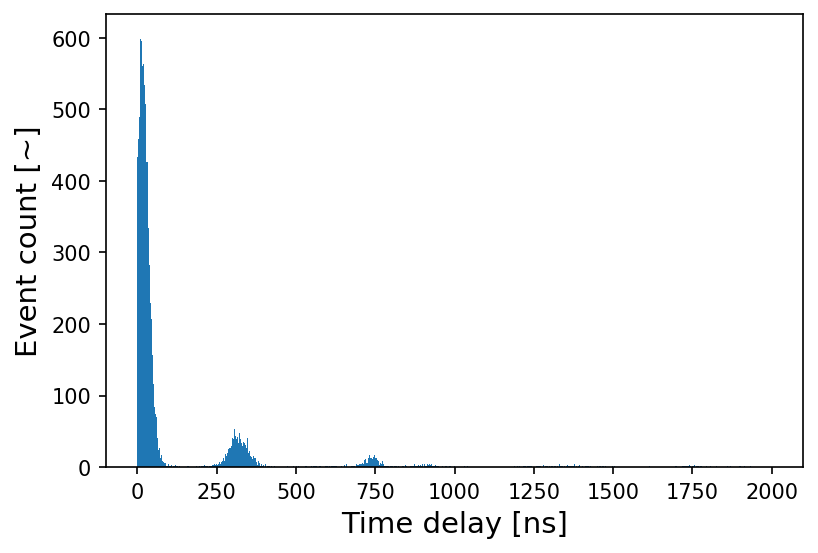

In [8]:
plt.figure(dpi=150)
plt.hist(time_delay / 1e3, bins=np.arange(0, 2000, 1), log=False)
plt.xlabel('Time delay [ns]', fontsize=14)
plt.ylabel('Event count [~]', fontsize=14)
plt.savefig('time_delay.png', dpi=150, bbox_inches='tight')